In [43]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math

### ONE SAMPLE TEST

In [44]:
# To check the mean of population and sample to a population

np.random.seed(6)

population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

bangalore_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
bangalore_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
bangalore_ages = np.concatenate((bangalore_ages1, bangalore_ages2))
print(population_ages.mean())
print(bangalore_ages.mean())

43.000112
39.26


In [45]:
stats.ttest_1samp(a=bangalore_ages,               #Sample data
                  popmean= population_ages.mean()) # Pop mean

Ttest_1sampResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678)

In [46]:
np.random.seed(6)

population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

bangalore_ages1 = stats.poisson.rvs(loc=18, mu=35, size=30)
bangalore_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
bangalore_ages = np.concatenate((bangalore_ages1, bangalore_ages2))
print(population_ages.mean())
print(bangalore_ages.mean())

43.000112
42.06


In [47]:
stats.ttest_1samp(a=bangalore_ages,               #Sample data
                  popmean= population_ages.mean()) # Pop mean # null hypothesis cannot be rejected as 
                                                   # they are no significantly different

Ttest_1sampResult(statistic=-0.5490541099464767, pvalue=0.5854618117977708)

## TWO SAMPLE  T TEST

In [48]:
from scipy import stats
a = [10,12,9,11,11,12,9,11,9,9]
b = [13,11,9,12,12,11,12,12,10,11]
c = stats.ttest_ind(a,b)
c

Ttest_indResult(statistic=-1.8534061896456464, pvalue=0.08028906893163547)

In [49]:
d = [13,12,9,12,12,13,12,13,10,11]
c = stats.ttest_ind(a,d)
c

Ttest_indResult(statistic=-2.4168284181234285, pvalue=0.026494688246160383)

## ANOVA

In [50]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('C:\\Users\\Parul\\Desktop\\DATASETS\\PlantGrowth.csv')
data.head()

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [51]:
#to check unoquie value in the category
pd.unique(data.group)

array(['ctrl', 'trt1', 'trt2'], dtype=object)

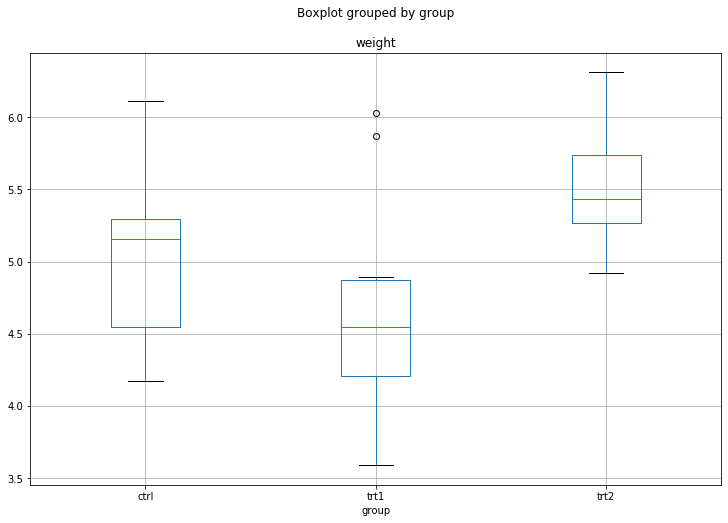

In [52]:
# Using boxplot
data.boxplot('weight','group',figsize=(12,8))

In [53]:
# to check the treatment better or not using 'for' loops
grps=pd.unique(data.group.values)
d_data={i:data['weight'][data.group==i]for i in grps}

In [54]:
d_data

{'ctrl': 0    4.17
 1    5.58
 2    5.18
 3    6.11
 4    4.50
 5    4.61
 6    5.17
 7    4.53
 8    5.33
 9    5.14
 Name: weight, dtype: float64, 'trt1': 10    4.81
 11    4.17
 12    4.41
 13    3.59
 14    5.87
 15    3.83
 16    6.03
 17    4.89
 18    4.32
 19    4.69
 Name: weight, dtype: float64, 'trt2': 20    6.31
 21    5.12
 22    5.54
 23    5.50
 24    5.37
 25    5.29
 26    4.92
 27    6.15
 28    5.80
 29    5.26
 Name: weight, dtype: float64}

In [55]:
# to check the treatment in different groups & to check any significant difference is their or not
from scipy import stats
F,p=stats.f_oneway(d_data['ctrl'],d_data['trt1'],d_data['trt2'])
print("F value is:",F)
print("P value is:",p)

F value is: 4.846087862380136
P value is: 0.0159099583256229


## ANOVA - TWO WAY

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot
from scipy import stats

In [57]:
datafile="C:\\Users\\Parul\\Desktop\\DATASETS\\ToothGrowth.csv"
data=pd.read_csv(datafile)
data.shape

(60, 4)

In [58]:
data.head()

,Unnamed: 0,len,supp,dose
0,1,4.2,VC,0.5
1,2,11.5,VC,0.5
2,3,7.3,VC,0.5
3,4,5.8,VC,0.5
4,5,6.4,VC,0.5


In [59]:
pd.unique(data.supp)

array(['VC', 'OJ'], dtype=object)

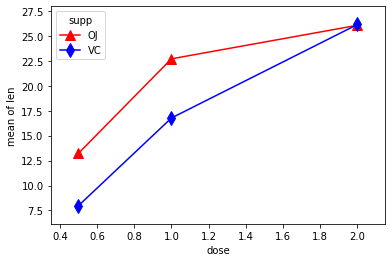

In [60]:
fig=interaction_plot(data.dose,data.supp,data.len,colors=['red','blue'],markers=['^','d'],ms=10)

In [61]:
#Degrees of Freedom
N=len(data.len)
df_a=len(data.supp.unique())-1
df_b=len(data.dose.unique())-1
df_axb=df_a*df_b
df_w=N-(len(data.supp.unique())*len(data.dose.unique()))
df_w

54

In [62]:
#Sum of Squares
grand_mean=data['len'].mean()
ssq_a=sum([(data[data.supp==i].len.mean()-grand_mean)**2 for i in data.supp])
ssq_b=sum([(data[data.dose==i].len.mean()-grand_mean)**2 for i in data.dose])
ssq_t=sum((data.len-grand_mean)**2)
vc=data[data.supp=='VC']
oj=data[data.supp=='OJ']
vc_dose_means=[vc[vc.dose==i].len.mean() for i in vc.dose]
oj_dose_means=[oj[oj.dose==i].len.mean() for i in oj.dose]
ssq_w=sum((oj.len-oj_dose_means)**2)+sum((vc.len-vc_dose_means)**2)
ssq_axb=ssq_t-ssq_a-ssq_b-ssq_w

In [63]:
ssq_axb

108.31900000000155

In [64]:
# Mean of Square
ms_a=ssq_a/df_a
ms_b=ssq_b/df_b
ms_axb=ssq_axb/df_axb
ms_w=ssq_w/df_w

In [65]:
ms_w

13.187148148148149

In [66]:
#F-Ratio
f_a=ms_a/ms_w
f_b=ms_b/ms_w
f_axb=ms_axb/ms_w
f_axb

4.106991094022578

In [67]:
#P-Value
p_a=stats.f.sf(f_a,df_a,df_w)
p_b=stats.f.sf(f_b,df_b,df_w)
p_axb=stats.f.sf(f_axb,df_axb,df_w)

In [68]:
p_axb

0.021860268964789892